# Unsupervised Learning Final Project

This is the final project for the **Data Science in Python: Unsupervised Learning** course. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters
7. Make Recommendations

## 0. Goal & Scope

**GOAL**: You are trying to better understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Your task is to use a clustering technique to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## 1. Data Prep & EDA

### a. Data Prep: Check the data types

The data can be found in the `employee_data.csv` file.

In [1]:
# read in the employee data
import pandas as pd

employee = pd.read_csv('../Data/employee_data.csv')
employee.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [2]:
# note the number of rows and columns
employee

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No
...,...,...,...,...,...,...,...,...,...,...
1465,3061,36,Male,23,2,Research & Development,2571,3,4,No
1466,3062,39,Male,6,3,Research & Development,9991,3,1,No
1467,3064,27,Male,4,2,Research & Development,6142,4,2,No
1468,3065,49,Male,2,2,Sales,5390,3,2,No


In [3]:
# view the data types of all the columns
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [4]:
# look at the numeric columns


In [5]:
# look at the non-numeric columns


### b. Data Prep: Convert the data types

Use `np.where` and `pd.get_dummies` to create a DataFrame for modeling where all fields are numeric.

In [6]:
# create a copy of the dataframe
df = employee.copy()
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [7]:
# look at the gender values
df.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [8]:
# change gender into a numeric field using np.where
import numpy as np 

df.Gender = np.where(df.Gender == 'Male', 0, 1)
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,1,1,2,Sales,5993,3,4,Yes
1,1002,49,0,8,2,Research & Development,5130,4,2,No
2,1004,37,0,2,1,Research & Development,2090,3,3,Yes
3,1005,33,1,3,1,Research & Development,2909,3,3,No
4,1007,27,0,2,1,Research & Development,3468,3,2,No


In [9]:
# look at the attrition values
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [10]:
# change attrition to a numeric field using np.where
df.Attrition = np.where(df.Attrition == 'No', 0, 1)
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,1,1,2,Sales,5993,3,4,1
1,1002,49,0,8,2,Research & Development,5130,4,2,0
2,1004,37,0,2,1,Research & Development,2090,3,3,1
3,1005,33,1,3,1,Research & Development,2909,3,3,0
4,1007,27,0,2,1,Research & Development,3468,3,2,0


In [11]:
# look at the department values
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [12]:
# change department to a numeric field via dummy variables
departments = pd.get_dummies(df.Department).astype(int)
departments.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [13]:
# attach the columns back on to the dataframe
df = pd.concat([df, departments], axis = 1)
df.drop(columns = ['Department'], inplace = True)
df.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0


In [14]:
# view the cleaned dataframe
df

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,1,0,0,1
1,1002,49,0,8,2,5130,4,2,0,0,1,0
2,1004,37,0,2,1,2090,3,3,1,0,1,0
3,1005,33,1,3,1,2909,3,3,0,0,1,0
4,1007,27,0,2,1,3468,3,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,3061,36,0,23,2,2571,3,4,0,0,1,0
1466,3062,39,0,6,3,9991,3,1,0,0,1,0
1467,3064,27,0,4,2,6142,4,2,0,0,1,0
1468,3065,49,0,2,2,5390,3,2,0,0,0,1


In [15]:
# note the number of rows and columns


### c. EDA

Our goal is to find the different types of employees at the company and take a look at their attrition (whether they end up leaving or not).

In [16]:
# what is the overall attrition for all employees in the data aka what percent of employees leave the company?
(df['Attrition'].mean() * 100).round(2)


16.12

In [17]:
# create a summary table to show the mean of each column for employees who stay vs leave - what are your takeaways?
df.iloc[:, 1:].groupby(by='Attrition').mean()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
Attrition,,,,,,,,,,
0,37.561233,0.406326,8.915653,2.145985,6832.739659,3.153285,2.778589,0.041363,0.671533,0.287105
1,33.607595,0.367089,10.632911,1.637131,4787.092827,3.156118,2.468354,0.050633,0.561181,0.388186


# Key Findings:
## 🔴 High-Risk Factors for Attrition:

* Lower Income (-$2,046/month, -30% less than stayers)
* Lower Job Level (1.64 vs 2.15 - more junior employees leaving)
* Younger Age (4 years younger on average)
* Lower Job Satisfaction (2.47 vs 2.78)
* Greater Commute Distance (10.6 km vs 8.9 km)

## 📊 Department Differences:

* Sales has higher attrition (39% of leavers vs 29% of stayers)
* R&D has lower attrition (56% of leavers vs 67% of stayers)

## ✅ What's NOT driving attrition:

* Performance ratings are nearly identical (3.16 vs 3.15) - good performers are leaving!

### d. Data Prep: Remove the Attrition and ID Columns

Exclude the attrition column (to be overlayed onto our clusters later on) and the ID column.

In [18]:
# create a new dataframe without the attrition column for us to model on
X = df.drop(columns = ['Attrition']).copy()
X.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,1001,41,1,1,2,5993,3,4,0,0,1
1,1002,49,0,8,2,5130,4,2,0,1,0
2,1004,37,0,2,1,2090,3,3,0,1,0
3,1005,33,1,3,1,2909,3,3,0,1,0
4,1007,27,0,2,1,3468,3,2,0,1,0


In [19]:
# drop the employee column as well before modeling
X.drop(columns = ['EmployeeID'], inplace = True)
X.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0


In [20]:
# note the number of rows and columns in the dataframe
X

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,41,1,1,2,5993,3,4,0,0,1
1,49,0,8,2,5130,4,2,0,1,0
2,37,0,2,1,2090,3,3,0,1,0
3,33,1,3,1,2909,3,3,0,1,0
4,27,0,2,1,3468,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,2571,3,4,0,1,0
1466,39,0,6,3,9991,3,1,0,1,0
1467,27,0,4,2,6142,4,2,0,1,0
1468,49,0,2,2,5390,3,2,0,0,1


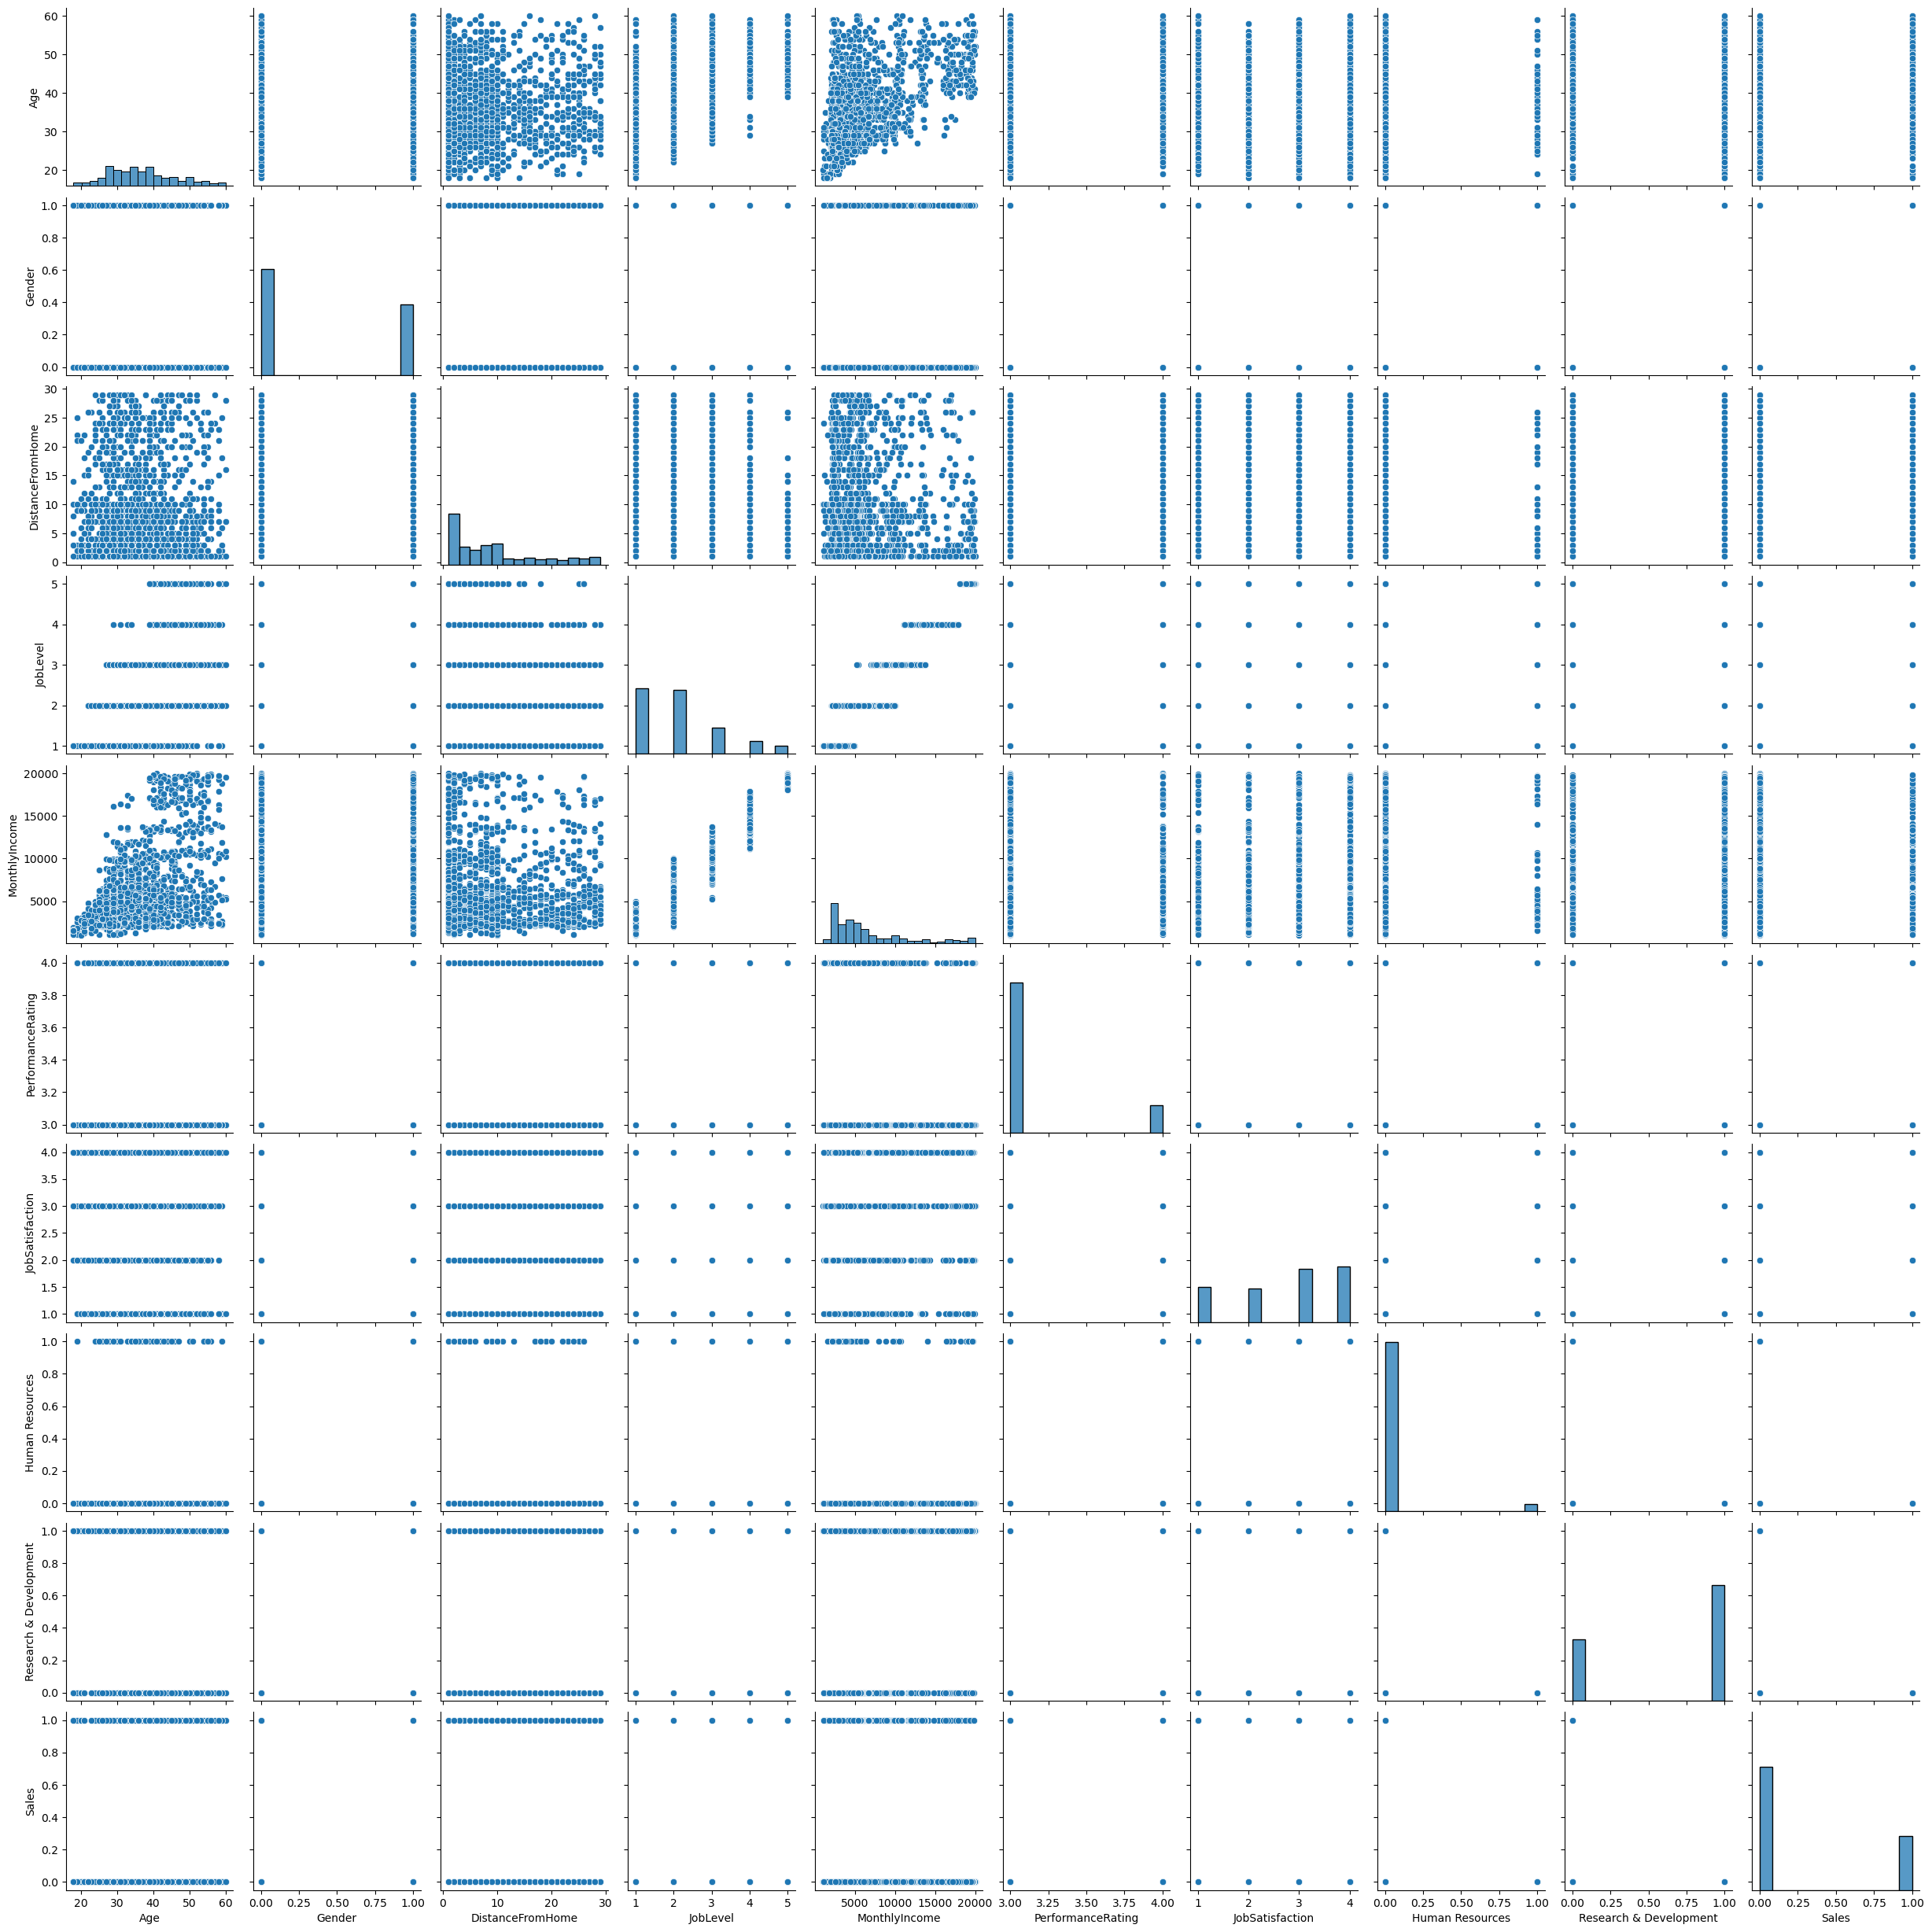

In [21]:
# create a pair plot comparing all the columns of the dataframe - what observations do you notice?
import seaborn as sns

sns.pairplot(X);

* Age - Roughly uniform distribution across 20-60 years
* Income/Salary variable - Heavily right-skewed with most values clustered low and a long tail extending to ~60,000
* There's a clear linear relationship between what looks like Age and MonthlyIncome
* Most variable pairs show scattered, patternless distributions suggesting no strong relationships

## 2. K-Means Clustering

Let's segment the employees using K-Means clustering.

### a. Standardize the data

In [22]:
# scale the data using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960


In [23]:
# double check that all the column means are 0 and standard deviations are 1
X_scaled.describe()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,-4.350262e-17,4.350262e-17,-2.658493e-17,-4.471102e-17,-6.114534e-16,-9.183886e-17,6.767074e-17,2.900174e-17,8.458842e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-8.164966e-01,-1.010909e+00,-9.614864e-01,-1.167343e+00,-4.262300e-01,-1.567907e+00,-2.116037e-01,-1.374051e+00,-6.599598e-01
25%,-7.581700e-01,-8.164966e-01,-8.875151e-01,-9.614864e-01,-7.632087e-01,-4.262300e-01,-6.608532e-01,-2.116037e-01,-1.374051e+00,-6.599598e-01
50%,-1.011589e-01,-8.164966e-01,-2.705440e-01,-5.778755e-02,-3.365516e-01,-4.262300e-01,2.462002e-01,-2.116037e-01,7.277751e-01,-6.599598e-01
75%,6.653541e-01,1.224745e+00,5.932157e-01,8.459113e-01,3.986245e-01,-4.262300e-01,1.153254e+00,-2.116037e-01,7.277751e-01,1.515244e+00
max,2.526886e+00,1.224745e+00,2.444129e+00,2.653309e+00,2.867626e+00,2.346151e+00,1.153254e+00,4.725816e+00,7.277751e-01,1.515244e+00


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [24]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = []

for k in range(2,16):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

Text(0.5, 1.0, 'Number of Cluster vs Inertia')

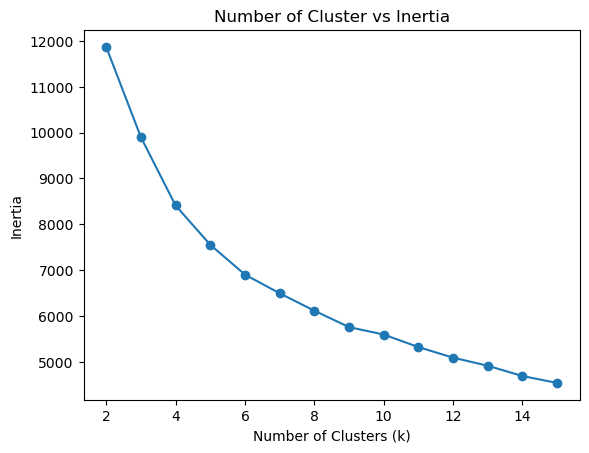

In [25]:
# plot the inertia values
from matplotlib import pyplot as plt

inertia_series = pd.Series(inertia_values, index = range(2,16))

inertia_series.plot(marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Cluster vs Inertia')

Text(0.5, 1.0, 'Number of Cluster vs Silhouette Score')

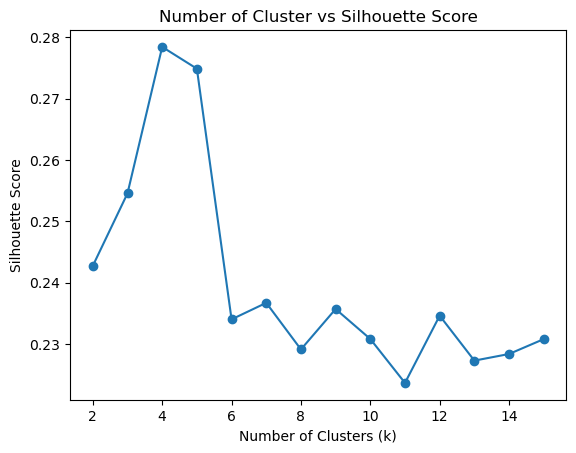

In [26]:
# plot the silhouette scores
silhouette_scores_series = pd.Series(silhouette_scores, index = range(2,16))

silhouette_scores_series.plot(marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Number of Cluster vs Silhouette Score')

### c. Identify a k value that looks like an elbow on the inertia plot and has a high silhouette score

In [27]:
# fit a kmeans model for the k value that you identified
kmeans4 = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
kmeans4.fit(X_scaled)
kmeans4.labels_

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [28]:
# find the number of employees in each cluster
from collections import Counter
Counter(kmeans4.labels_)

Counter({0: 747, 1: 407, 2: 253, 3: 63})

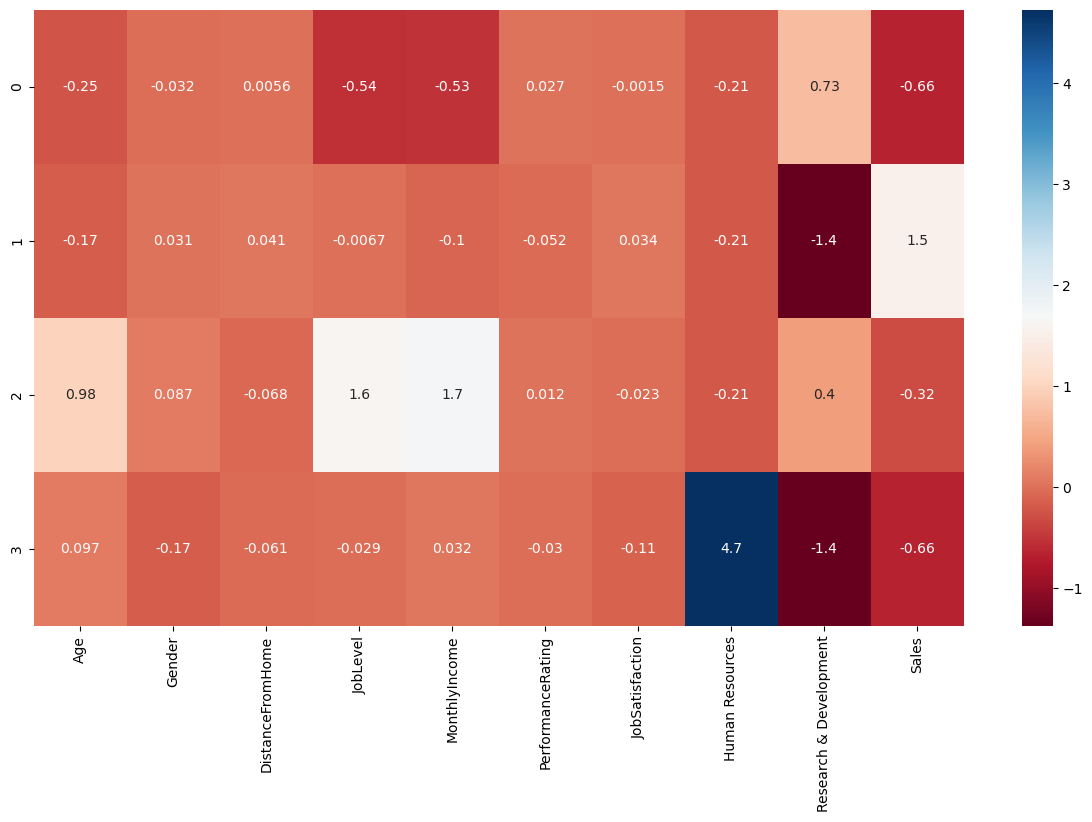

In [29]:
# create a heat map of the cluster centers
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns = X_scaled.columns)

import seaborn as sns

plt.figure(figsize=(15, 8));
sns.heatmap(cluster_centers4, cmap = 'RdBu', annot = True);
plt.show();

In [30]:
# interpret the clusters


## Cluster 0: Junior R&D Employees

* Younger (-0.25), lower job level (-0.54), lower income (-0.53)
* Strong R&D presence (0.73), very low Sales (-0.66)
* Somewhat low job satisfaction (-0.21)
* This group represents entry-level to mid-level R&D workers

## Cluster 1: Sales Department

* All features near average except department
* Extremely high Sales (1.5) and very low R&D (-1.4)
* Clear departmental segmentation - this is your Sales team

## Cluster 2: Senior Leadership/Executives

* Older (0.98), high job level (1.6), high monthly income (1.7) - all blue/high
* Moderate job satisfaction (0.4)
* Not concentrated in Sales or HR
* These are your experienced, well-compensated senior employees

## Cluster 3: Human Resources Department

* EXTREMELY high Human Resources (4.7) - the dark blue standout
* Very low R&D (-1.4) and low Sales (-0.66)
* Average age, income, and satisfaction
* This is almost exclusively the HR department

## 3. PCA

Let's visualize the data using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [31]:
# fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_scaled)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [32]:
# view the explained variance ratio
pca.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [33]:
# view the components
pca.components_

array([[ 0.43287352,  0.04877625, -0.00285089,  0.60509274,  0.59445012,
        -0.02556521, -0.00472736,  0.02964393, -0.21392918,  0.20833797],
       [ 0.21384802, -0.00840873, -0.01653328,  0.14533326,  0.17730123,
         0.04153184, -0.01140416, -0.11374447,  0.67887246, -0.65246219]])

In [34]:
# view the columns
X.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction', 'Human Resources',
       'Research & Development', 'Sales'],
      dtype='object')

In [35]:
# interpret the components


## Principal Component 1 (PC1)
Interpretation: This is a "career progression/seniority" component. It captures employees who are:

* Higher job levels with higher salaries
* Older/more experienced
* Slightly more likely to be in Sales (vs R&D)

This component represents the natural correlation between experience, rank, and compensation.

## Principal Component 2 (PC2)
Interpretation: This is a "department contrast" component, primarily separating:

* R&D employees (positive direction) - slightly older, higher paid/ranked
* Sales employees (negative direction) - younger, lower compensated

### b. Overlay the K-Means cluster colors

In [36]:
# transform the data
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns = ['component 1', 'component 2'])
df_pca.head()

,component 1,component 2
0,0.765263,-1.853973
1,-0.031684,1.285674
2,-1.462588,0.645564
3,-1.449531,0.563547
4,-1.758252,0.473654


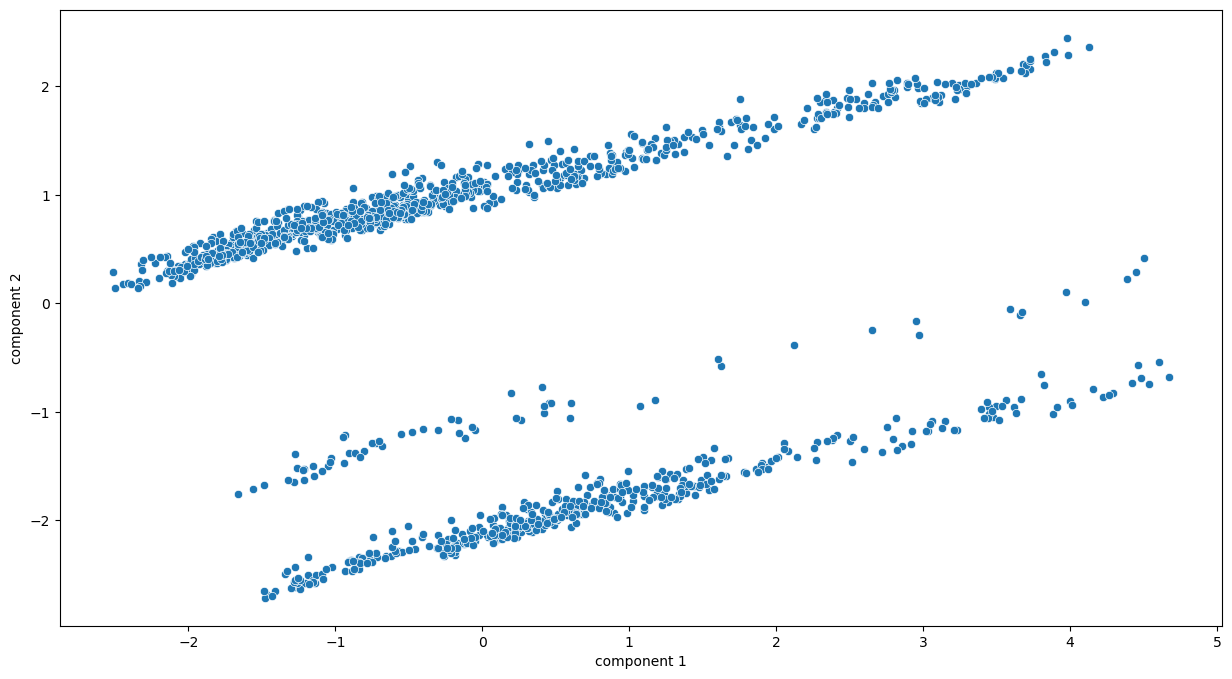

In [37]:
# plot the data
plt.figure(figsize=(15, 8));
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_pca);
plt.show()

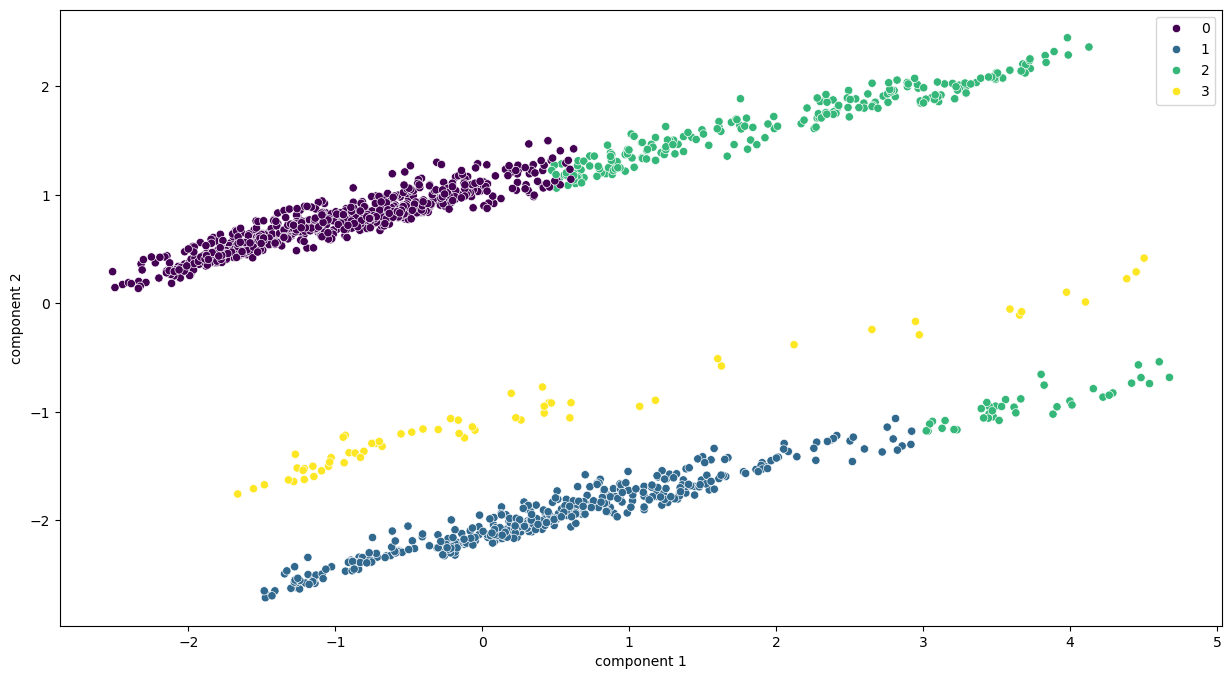

In [38]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)

plt.figure(figsize=(15, 8));
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_pca,  hue=kmeans4.labels_, palette='viridis');
plt.show()

### c. Overlay the Department colors instead

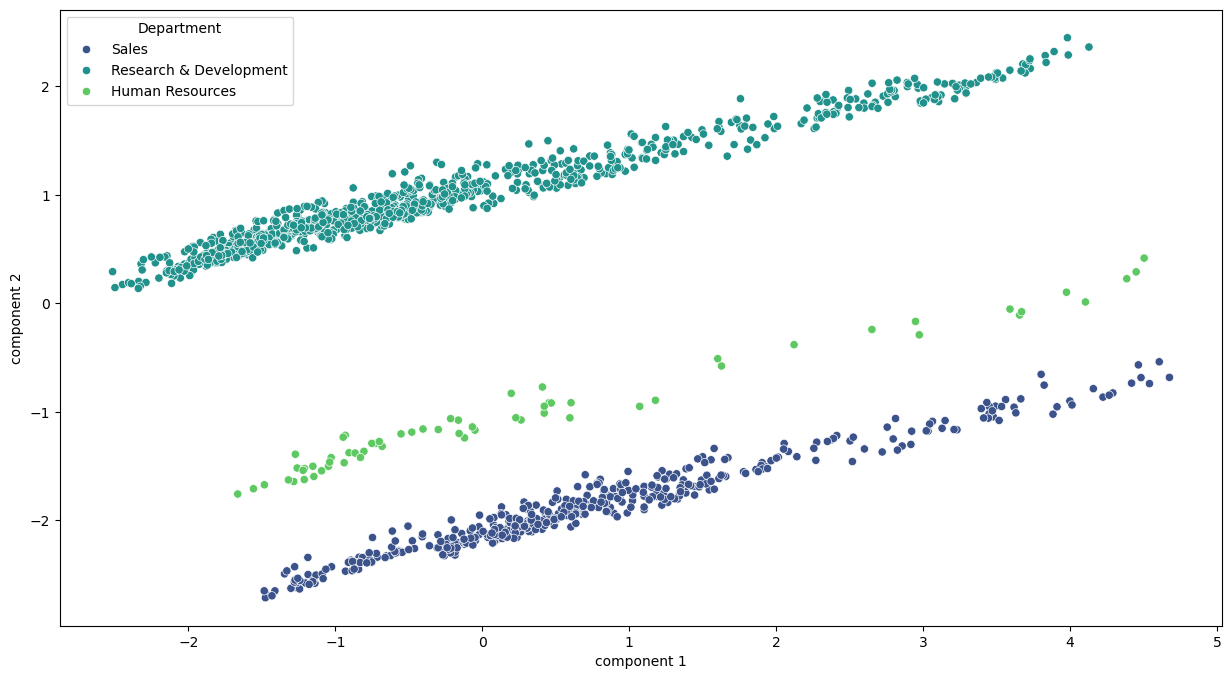

In [39]:
# overlay the department colors (hint: set the hue to be the department column)
plt.figure(figsize=(15, 8));
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_pca,  hue=employee.Department, palette='viridis');
plt.show()

## 4. K-Means Clustering: Round 2

Since the departments seemed to dominate the visualization, let's exclude them and try fitting more K-Means models.

### a. Create a new dataframe without the Departments

In [40]:
# create a new dataframe that excludes the three department columns from the scaled dataframe
X_scaled_nd = X_scaled.iloc[:, :-3]
X_scaled_nd.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction
0,0.446350,1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254
1,1.322365,-0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853
2,0.008343,-0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200
3,-0.429664,1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200
4,-1.086676,-0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853


### b. Write a loop to fit models with 2 to 15 clusters and record the inertia and silhouette scores

In [41]:
# write a loop to fit models with 2 to 15 clusters
inertia_values_nd = []
silhouette_scores_nd = []

for k in range(2,16):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled_nd)
    inertia_values_nd.append(kmeans.inertia_)
    silhouette_scores_nd.append(silhouette_score(X_scaled_nd, kmeans.labels_, metric='euclidean', sample_size=None))

Text(0.5, 1.0, 'Number of Cluster vs Inertia')

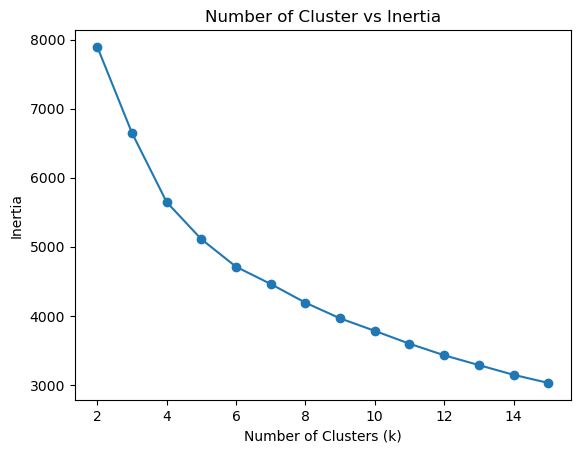

In [42]:
# plot the inertia values
inertia_series_nd = pd.Series(inertia_values_nd, index = range(2,16))

inertia_series_nd.plot(marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Cluster vs Inertia')

Text(0.5, 1.0, 'Number of Cluster vs Silhouette Score')

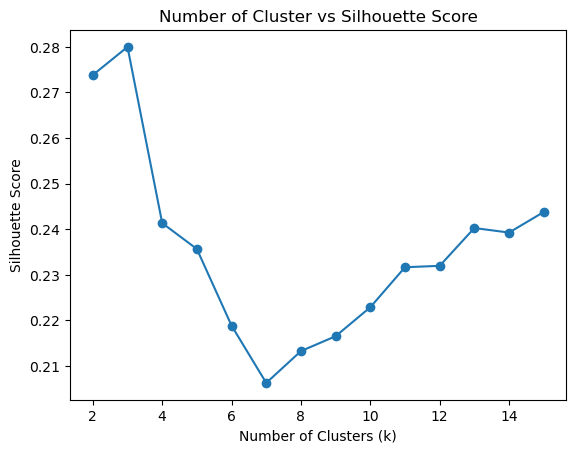

In [43]:
# plot the silhouette scores
silhouette_scores_series_nd = pd.Series(silhouette_scores_nd, index = range(2,16))

silhouette_scores_series_nd.plot(marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Number of Cluster vs Silhouette Score')

### c. Identify a few k values that looks like an elbow on the inertia plot and have a high silhouette score

#### i. k = [some value]

In [44]:
# fit a kmeans model for the k value that you identified
k = 3

kmeans3 = KMeans(n_clusters = k, n_init = 10, random_state = 42)
kmeans3.fit(X_scaled_nd)
kmeans3.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [45]:
# find the number of employees in each cluster
Counter(kmeans3.labels_)

Counter({1: 988, 2: 282, 0: 200})

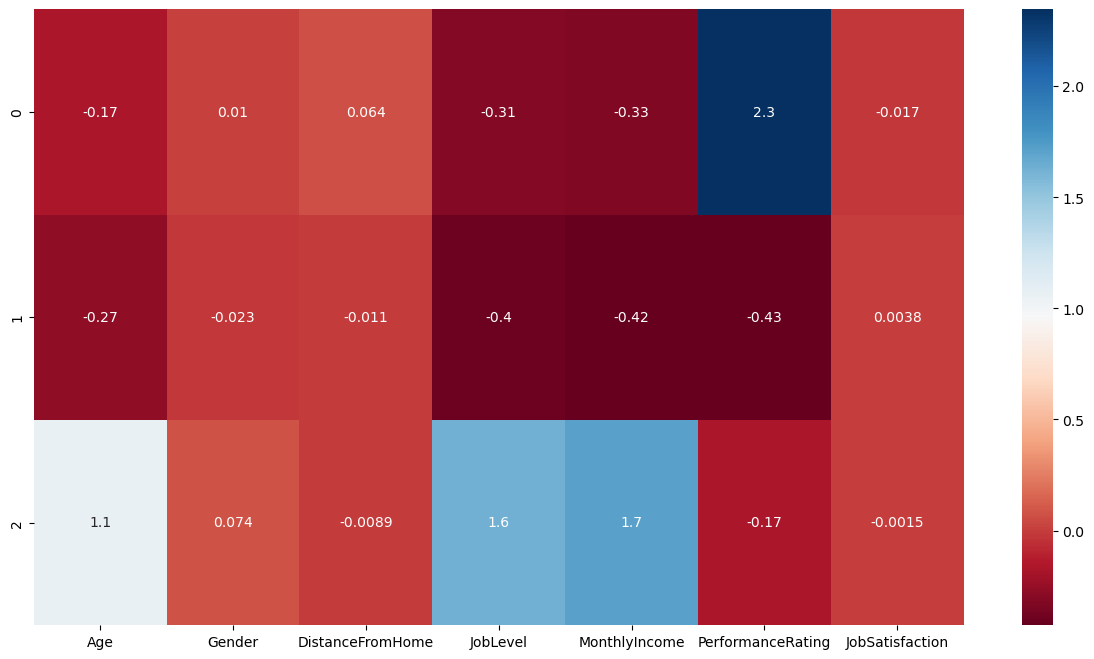

In [46]:
# create a heat map of the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns = X_scaled_nd.columns)

plt.figure(figsize=(15, 8));
sns.heatmap(cluster_centers3, cmap = 'RdBu', annot = True);
plt.show();

In [47]:
# interpret the clusters


## Cluster 0 - "High-Performing Junior Talent"
* Exceptionally high performance ratings (2.3 - by far the strongest signal)
* Lower job levels and salaries

## Cluster 1 - "Struggling Employees"
* Lower performance, lower job level, lower income across the 

## Cluster 2 - "Tenured Veterans"
* Older, higher seniority, higher pay
* Slightly lower performance ratings

#### ii. k = [another value]

In [48]:
# fit a kmeans model for the k value that you identified
k = 4

kmeans4 = KMeans(n_clusters = k, n_init = 10, random_state = 42)
kmeans4.fit(X_scaled_nd)
kmeans4.labels_

array([0, 3, 2, ..., 3, 2, 2], dtype=int32)

In [49]:
# find the number of employees in each cluster
Counter(kmeans4.labels_)

Counter({2: 616, 0: 405, 1: 249, 3: 200})

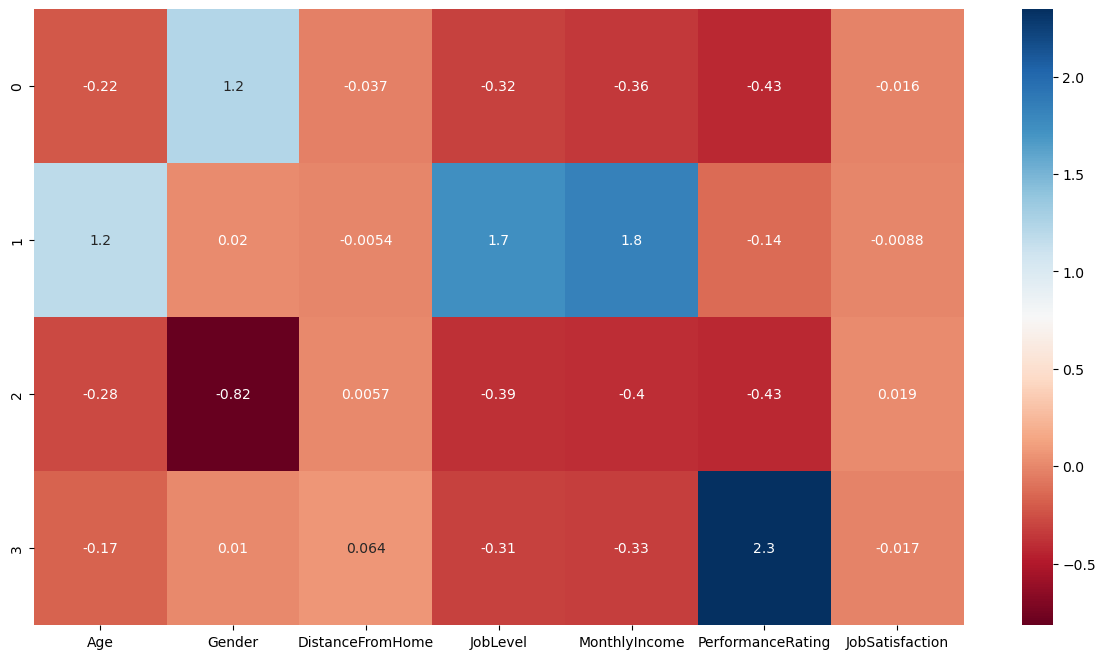

In [50]:
# create a heat map of the cluster centers
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns = X_scaled_nd.columns)

plt.figure(figsize=(15, 8));
sns.heatmap(cluster_centers4, cmap = 'RdBu', annot = True);
plt.show();

In [51]:
# interpret the clusters


## Cluster 0 - "Undervalued Mid-Career Group"
* Mostly female
* Lower job levels, income, and performance

## Cluster 1 - "Senior Established Employees"

* Older, higher job levels, higher income
* Slightly lower performance ratings

## Cluster 2 - "Struggling Junior Staff"
* Mostly male
* Lower across age, job level, income, and performance

## Cluster 3 - "High-Performing Rising Stars"
* Exceptional performance but underpaid and under-leveled



In [52]:
#### iii. k = [another value]

In [53]:
# fit a kmeans model for the k value that you identified
k = 6

kmeans6 = KMeans(n_clusters = k, n_init = 10, random_state = 42)
kmeans6.fit(X_scaled_nd)
kmeans6.labels_


array([3, 1, 0, ..., 1, 5, 0], dtype=int32)

In [54]:
# find the number of employees in each cluster
Counter(kmeans6.labels_)

Counter({3: 349, 0: 304, 4: 219, 5: 201, 1: 200, 2: 197})

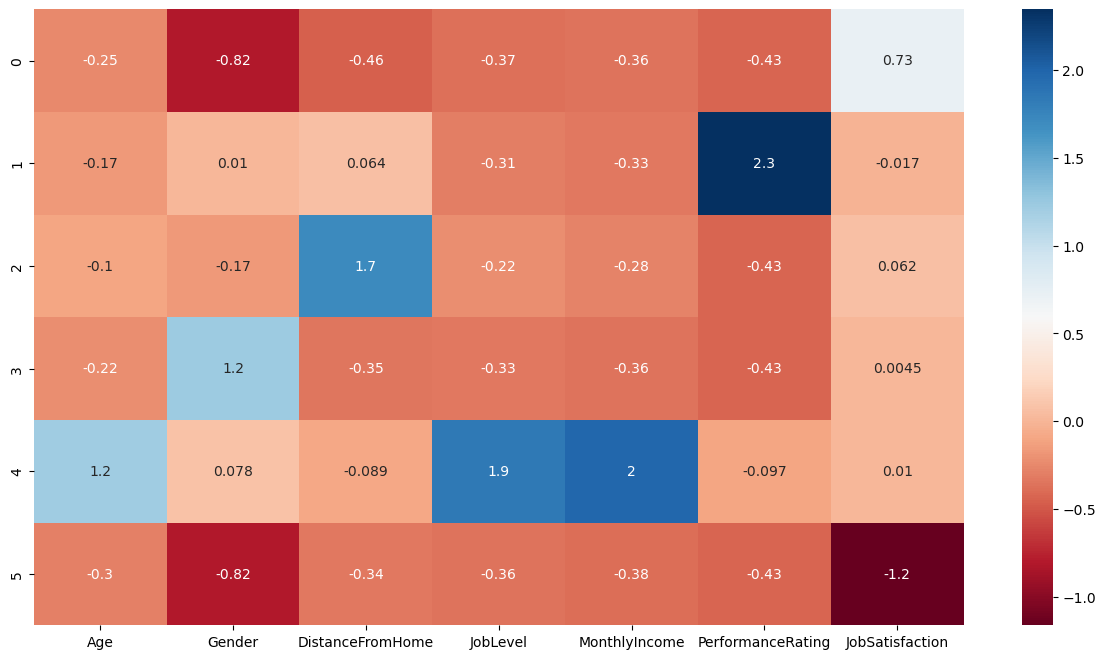

In [55]:
# create a heat map of the cluster centers
cluster_centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns = X_scaled_nd.columns)

plt.figure(figsize=(15, 8));
sns.heatmap(cluster_centers6, cmap = 'RdBu', annot = True);
plt.show();

In [56]:
# interpret the clusters


## Cluster 0 - "Happy Strugglers" (Paradox Group)
* Mostly Male
* Lower performance, income, job level BUT high job satisfaction

## Cluster 1 - "High-Performing Rising Stars"
* Exceptional performance but underpaid/under-leveled

## Cluster 2 - "Long-Distance Commuters"
* High distance from home
* Lower performance/income

## Cluster 3 - "Plateaued Mid-Career"
* Mostly Female
* Lower job level/income/performance
  
## Cluster 4 - "Senior Leadership"
* Older, highest job levels and income (2.0)

## Cluster 5 - "Disengaged"
* Mostly Male
* Low everything 

## 5. PCA: Round 2

Let's visualize the data (without Departments) using PCA.

### a. Fit a PCA Model with 2 components for visualization

In [57]:
# fit a PCA model with 2 components
pca2 = PCA(n_components = 2)
pca2.fit(X_scaled_nd)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [58]:
# view the explained variance ratio
pca2.explained_variance_ratio_

array([0.33354222, 0.14850324])

In [59]:
# view the components
pca2.components_

array([[ 0.47124275,  0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [ 0.01896906,  0.58615904,  0.41405416, -0.01838822, -0.02778096,
         0.4833175 , -0.49991119]])

In [60]:
# view the columns
X_scaled_nd.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

In [61]:
# interpret the components


### b. Overlay the K-Means cluster colors

In [62]:
# transform the data
X_pca2 = pca2.fit_transform(X_scaled_nd)
df_pca2 = pd.DataFrame(X_pca2, columns = ['component 1', 'component 2'])
df_pca2.head()

,component 1,component 2
0,0.168712,-0.470665
1,0.334248,0.959030
2,-1.205213,-1.131272
3,-1.210236,0.103169
4,-1.532824,-0.706731


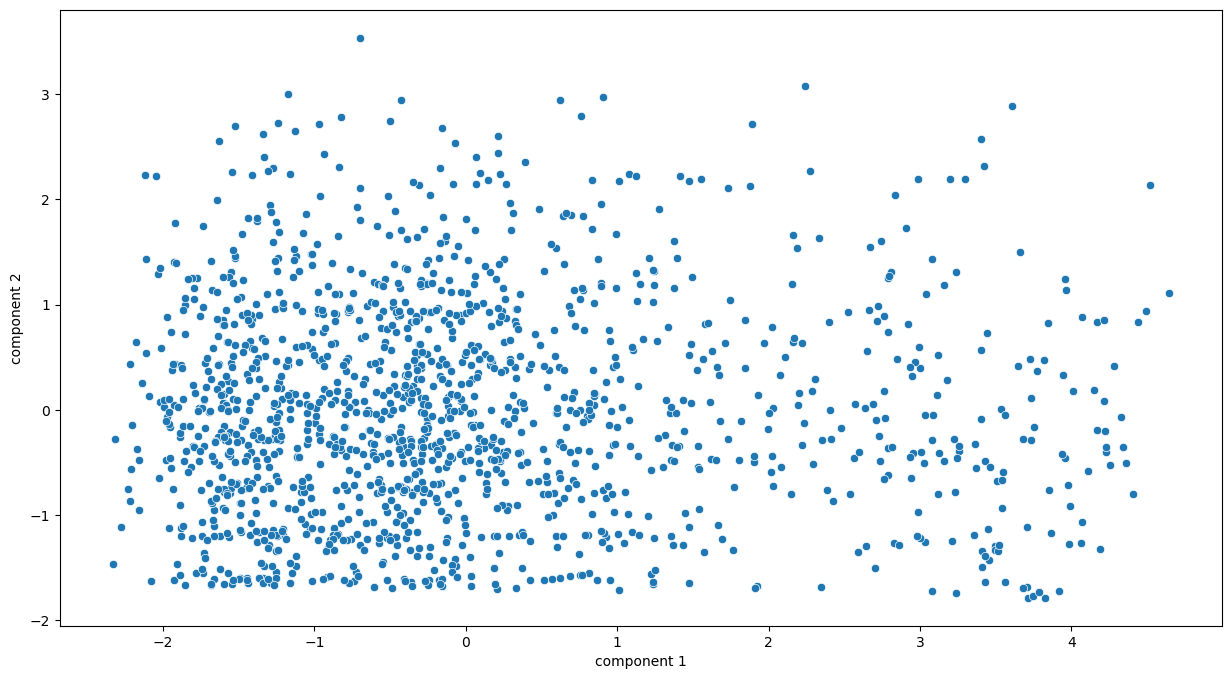

In [63]:
# plot the data
plt.figure(figsize=(15, 8));
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_pca2);
plt.show()

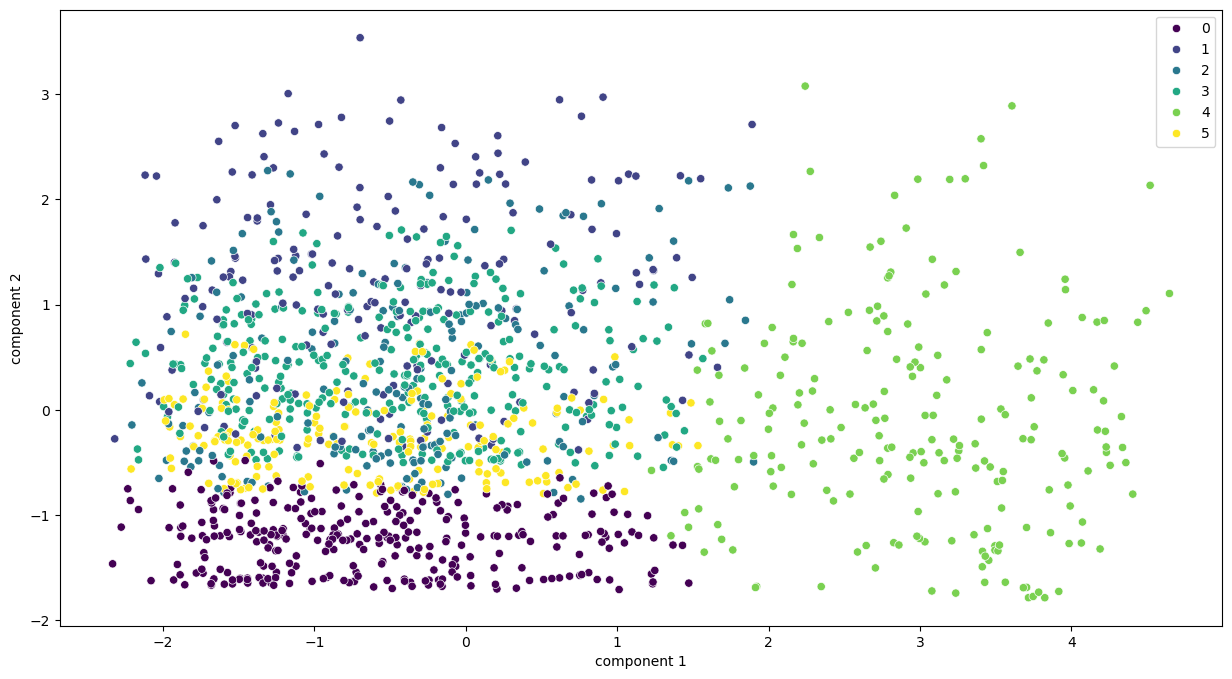

In [64]:
# overlay the kmeans clusters (choose your favorite k-means model from the previous section)
plt.figure(figsize=(15, 8));
sns.scatterplot(x = 'component 1', y = 'component 2', data = df_pca2,  hue=kmeans6.labels_, palette='viridis');
plt.show()

### c. OPTIONAL: Create a 3D plot

In [65]:
# fit a PCA model with 3 components
pca3 = PCA(n_components = 3)
pca3.fit(X_scaled_nd)

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [66]:
# view the explained variance ratio
pca3.explained_variance_ratio_

array([0.33354222, 0.14850324, 0.14578114])

In [67]:
# view the components
pca3.components_

array([[ 0.47124275,  0.0460627 , -0.00629691,  0.62393147,  0.62140377,
        -0.01687984, -0.00712661],
       [ 0.01896906,  0.58615904,  0.41405416, -0.01838822, -0.02778096,
         0.4833175 , -0.49991119],
       [ 0.02702996, -0.36313603,  0.55488385,  0.02159616,  0.01065236,
         0.52050007,  0.53666127]])

In [68]:
# view the columns
X_scaled_nd.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'PerformanceRating', 'JobSatisfaction'],
      dtype='object')

In [69]:
# interpret the components


In [70]:
# transform the data
X_pca3 = pca3.fit_transform(X_scaled_nd)
df_pca3 = pd.DataFrame(X_pca3, columns = ['component 1', 'component 2', 'component 3'])
df_pca3.head()

,component 1,component 2,component 3
0,0.168712,-0.470665,-0.598970
1,0.334248,0.959030,1.112754
2,-1.205213,-1.131272,-0.316222
3,-1.210236,0.103169,-0.998987
4,-1.532824,-0.706731,-0.829482


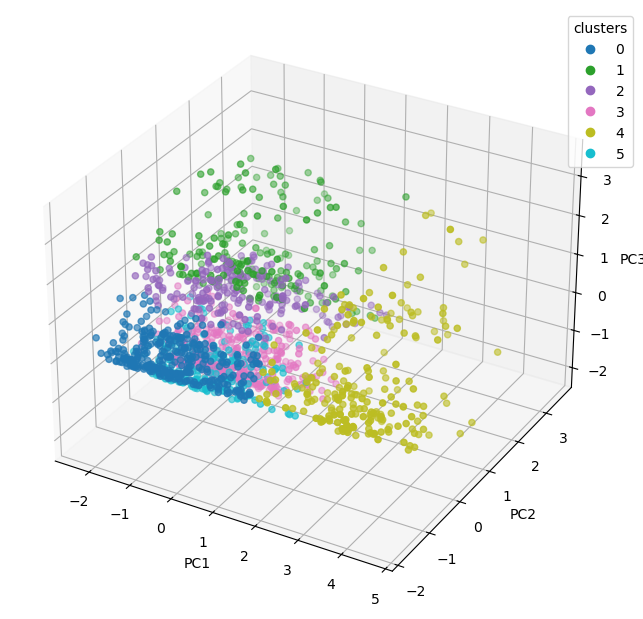

In [72]:
# create a 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D
cluster_labels = pd.Series(kmeans6.labels_, name = 'cluster')
df_clean = pd.concat([df_pca3, cluster_labels], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig)
fig.add_axes(ax)

sc = ax.scatter(df_clean['component 1'], df_clean['component 2'], df_clean['component 3'], c = df_clean['cluster'], cmap = 'tab10')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend(*sc.legend_elements(), title = 'clusters', bbox_to_anchor=(1.05, 1));

## 6. EDA on Clusters

Let's decide to go with the 6 clusters without department data.

### a. Confirm the 6 clusters

In [73]:
# fit a kmeans model with 6 clusters
k = 6

kmeans6 = KMeans(n_clusters = k, n_init = 10, random_state = 42)
kmeans6.fit(X_scaled_nd)


,n_clusters,6
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [74]:
# view the cluster labels
kmeans6.labels_

array([3, 1, 0, ..., 1, 5, 0], dtype=int32)

### b. Create a dataframe with the cluster labels and names

In [75]:
# create a dataframe with two columns - one of the label and another of the cluster name

# create a mapping for the cluster names

# combine the labels and names into a single dataframe


In [76]:
clusters = pd.DataFrame(kmeans6.labels_, columns = ['Cluster'])
clusters.head()

,Cluster
0,3
1,1
2,0
3,3
4,5


In [77]:
cluster_mapping = {0 : "Happy Strugglers",
                   1 : "High-Performing Rising Stars",
                   2 : "Long-Distance Commuters",
                   3 : "Plateaued Mid-Career",
                   4 : "Senior Leadership",
                   5 : "Disengaged"
                  }

In [78]:
clusters['Cluster_Name'] = clusters['Cluster'].map(cluster_mapping)
clusters.head()

,Cluster,Cluster_Name
0,3,Plateaued Mid-Career
1,1,High-Performing Rising Stars
2,0,Happy Strugglers
3,3,Plateaued Mid-Career
4,5,Disengaged


### c. View the attrition rates for each cluster

In [80]:
# combine the clusters and attrition data
clusters =  pd.concat([clusters, df.Attrition], axis = 1)
clusters

,Cluster,Cluster_Name,Attrition
0,3,Plateaued Mid-Career,1
1,1,High-Performing Rising Stars,0
2,0,Happy Strugglers,1
3,3,Plateaued Mid-Career,0
4,5,Disengaged,0
...,...,...,...
1465,2,Long-Distance Commuters,0
1466,5,Disengaged,0
1467,1,High-Performing Rising Stars,0
1468,5,Disengaged,0


In [105]:
# what is the attrition rate for each cluster?
clusters.groupby(by = 'Cluster_Name').mean().round(2)*100

,Cluster,Attrition
Cluster_Name,,
Disengaged,500.0,19.0
Happy Strugglers,0.0,16.0
High-Performing Rising Stars,100.0,18.0
Long-Distance Commuters,200.0,22.0
Plateaued Mid-Career,300.0,15.0
Senior Leadership,400.0,7.0


In [111]:
# sort the values
(clusters.groupby(by = ['Cluster_Name'])['Attrition'].mean().round(2)*100).sort_values(ascending = False)

Cluster_Name
Long-Distance Commuters         22.0
Disengaged                      19.0
High-Performing Rising Stars    18.0
Happy Strugglers                16.0
Plateaued Mid-Career            15.0
Senior Leadership                7.0
Name: Attrition, dtype: float64

In [90]:
# interpret the findings


## Highest Risk Groups (15%+ attrition):
* Long-Distance Commuters (22%) - This is your biggest problem. The commute is clearly unsustainable. Consider remote work options, flexible schedules, or relocation assistance. This is low-hanging fruit for retention improvement.
* Disengaged (19%) - Second highest, and frankly these folks are already mentally checked out. They're likely already interviewing elsewhere. You need to understand why they're disengaged - is it management, lack of growth, compensation, or burnout?
* High-Performing Rising Stars (18%) - This should be alarming. Your top talent is leaving at nearly the same rate as your disengaged employees. They're probably being poached or hitting career ceilings. These are the people you can least afford to lose.
## Lower Risk Groups:
* Happy Strugglers (16%) and Plateaued Mid-Career (15%) - Moderate attrition, close to what might be baseline turnover.
* Senior Leadership (7%) - Lowest attrition, which makes sense given their compensation, equity, and career investment.

In [112]:
# find the number of employees in each cluster
clusters.Cluster.value_counts()

Cluster
3    349
0    304
4    219
5    201
1    200
2    197
Name: count, dtype: int64

### d. View the department breakdown for each cluster

In [113]:
# combine the clusters and department data
department_clusters_df = pd.concat([clusters, employee.Department], axis = 1)
department_clusters_df.head()

,Cluster,Cluster_Name,Attrition,Department
0,3,Plateaued Mid-Career,1,Sales
1,1,High-Performing Rising Stars,0,Research & Development
2,0,Happy Strugglers,1,Research & Development
3,3,Plateaued Mid-Career,0,Research & Development
4,5,Disengaged,0,Research & Development


In [101]:
# what is the attrition rate for each cluster + department combination?
department_attrition = department_clusters_df.groupby(by = ['Cluster_Name', 'Department']).mean().round(2)*100
department_attrition

Cluster  Attrition
Cluster_Name                 Department                                
Disengaged                   Human Resources           500.0       21.0
                             Research & Development    500.0       17.0
                             Sales                     500.0       22.0
Happy Strugglers             Human Resources             0.0        7.0
                             Research & Development      0.0       15.0
                             Sales                       0.0       19.0
High-Performing Rising Stars Human Resources           100.0       14.0
                             Research & Development    100.0       19.0
                             Sales                     100.0       18.0
Long-Distance Commuters      Human Resources           200.0       67.0
                             Research & Development    200.0       15.0
                             Sales                     200.0       31.0
Plateaued Mid-Career         Human Resources           300.0       30.0
                             Research & Development    300.0       12.0
                             Sales                     300.0       21.0
Senior Leadership            Human Resources           400.0        0.0
                             Research & Development    400.0        6.0
                             Sales                     400.0       12.0

In [102]:
# sort the values
department_attrition.sort_values(by = ['Attrition'], ascending = False)

Cluster  Attrition
Cluster_Name                 Department                                
Long-Distance Commuters      Human Resources           200.0       67.0
                             Sales                     200.0       31.0
Plateaued Mid-Career         Human Resources           300.0       30.0
Disengaged                   Sales                     500.0       22.0
Plateaued Mid-Career         Sales                     300.0       21.0
Disengaged                   Human Resources           500.0       21.0
High-Performing Rising Stars Research & Development    100.0       19.0
Happy Strugglers             Sales                       0.0       19.0
High-Performing Rising Stars Sales                     100.0       18.0
Disengaged                   Research & Development    500.0       17.0
Long-Distance Commuters      Research & Development    200.0       15.0
Happy Strugglers             Research & Development      0.0       15.0
High-Performing Rising Stars Human Resources           100.0       14.0
Plateaued Mid-Career         Research & Development    300.0       12.0
Senior Leadership            Sales                     400.0       12.0
Happy Strugglers             Human Resources             0.0        7.0
Senior Leadership            Research & Development    400.0        6.0
                             Human Resources           400.0        0.0

In [103]:
# interpret the findings


* Human Resources - Long-Distance Commuters: 67% attrition
* Sales (consistently high attrition across segments
* Research & Development (most stable)

In [114]:
# find the number of employees in each cluster + department combo
department_clusters_df.groupby(by = ['Cluster_Name', 'Department']).count()

Cluster  Attrition
Cluster_Name                 Department                                
Disengaged                   Human Resources              14         14
                             Research & Development      122        122
                             Sales                        65         65
Happy Strugglers             Human Resources              14         14
                             Research & Development      197        197
                             Sales                        93         93
High-Performing Rising Stars Human Resources               7          7
                             Research & Development      138        138
                             Sales                        55         55
Long-Distance Commuters      Human Resources               6          6
                             Research & Development      130        130
                             Sales                        61         61
Plateaued Mid-Career         Human Resources              10         10
                             Research & Development      223        223
                             Sales                       116        116
Senior Leadership            Human Resources              12         12
                             Research & Development      151        151
                             Sales                        56         56

## 7. Make Recommendations

In [ ]:
# looking at the clusters, what segment info would you share with the team?


## Priority 1 - Immediate Action Required (15%+ attrition):
* Long-Distance Commuters (22%): Employees with long commutes represent your biggest retention challenge. The commute burden is clearly unsustainable, especially for HR employees (67% attrition rate).
* Disengaged Employees (19%): These employees show low job satisfaction and are likely already interviewing elsewhere. This group is across all departments but particularly high in Sales (22%) and HR (21%).
* High-Performing Rising Stars (18%): This should be alarming - your top talent with high performance ratings and growth potential are leaving at nearly the same rate as disengaged employees. They're likely being poached by competitors or hitting internal career ceilings.

## Moderate Risk:
* Happy Strugglers (16%) and Plateaued Mid-Career (15%) show baseline turnover levels

## Stable Group:
* Senior Leadership (7%) - lowest attrition due to compensation, equity, and career investment

In [ ]:
# what recommendations would you suggest to retain employees in each cluster?


1. Long-Distance Commuters (22% attrition)
Recommendations:
* Immediate: Implement remote work options or hybrid schedule (2-3 days WFH)
* Offer flexible start/end times to avoid peak commute hours
* Provide commuter benefits (transit passes, parking subsidies, carpool incentives)
* Priority for HR department where attrition hits 67%

2. Disengaged (19% attrition)
Recommendations:
* Conduct exit interviews and stay interviews to understand root causes
* Address management quality - consider 360-degree feedback and leadership training
* Review compensation and benchmark against market rates
* Create clearer career development paths
* Implement workload audits to identify and address burnout


3. High-Performing Rising Stars (18% attrition)
Recommendations:
* Accelerated career paths - don't make them wait years for promotions
* Create "fast-track" programs for top performers
* Offer retention bonuses and competitive compensation reviews
* Provide challenging projects and cross-functional opportunities
* Implement mentorship programs connecting them with senior leadership
* Consider stock options or profit-sharing to increase investment in the company
* Conduct competitive market analysis

4. Happy Strugglers (16% attrition)
Recommendations:
* Invest in skills training and professional development
* Provide additional support and resources to improve performance
* Consider peer mentoring programs
* Regular check-ins to maintain job satisfaction
* Clear performance improvement plans with achievable milestones

5. Plateaued Mid-Career (15% attrition)
Recommendations:
* Create lateral movement opportunities to different departments/projects
* Offer leadership/management training for career pivots
* Implement job enrichment programs (special projects, committees)
* Provide opportunities to mentor junior employees
* Consider flexible arrangements (reduced hours, compressed workweeks)

6. Senior Leadership (7% attrition)
Recommendations:
* Continue current retention strategies
* Maintain competitive executive compensation
* Provide board opportunities or advisory roles
* Offer continued education (executive MBA, conferences)
* Ensure they feel valued and heard in strategic decisions


